In [61]:
%matplotlib ipympl
import matplotlib

import matplotlib.pyplot as plt
import numpy as np

In [62]:
x = [1, 2, 3, 4]
y = [11, 22, 33, 44]

## Axeses indices

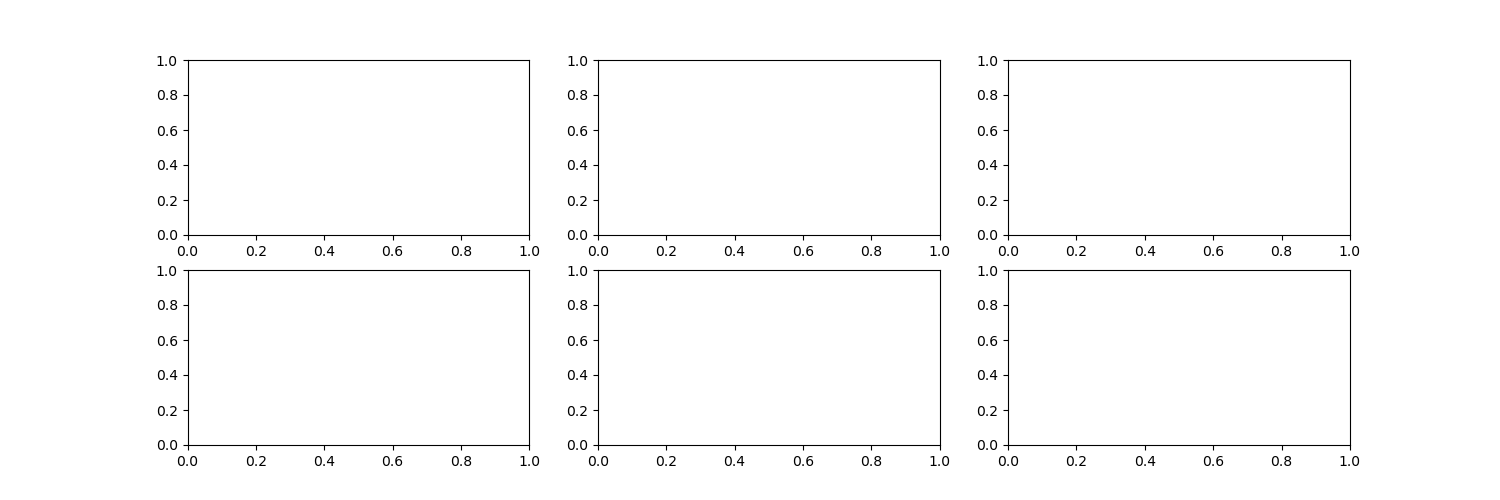

In [63]:
fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(15, 5))

In [64]:
top_left = axs[0, 0]
top_left.plot(x, y)
top_left.set(title="Sample Simple Plot", xlabel="x-axis", ylabel="y-axis");

In [65]:
top_right = axs[0, 2]
top_right.plot(x, [-n for n in y])
top_right.set(title="Sample Simple Plot (opposite)", xlabel="x-axis", ylabel="y-axis");

In [66]:
middle_top = axs[0, 1]
middle_top.hist(2);
middle_top.set(title="Fixed value", xlabel="x-axis", ylabel="y-axis");

In [67]:
bottom_left = axs[1, 0]
bottom_left.plot(x, [-n for n in y]);
bottom_right = axs[1, 2]
bottom_right.plot(x, y);

In [70]:
np.random.seed(0)
middle_bottom = axs[1, 1]
middle_bottom.hist(np.random.randn(30));

In [71]:
fig.show()

## Axeses destructuring

Text(0.5, 0, 'x-vals')

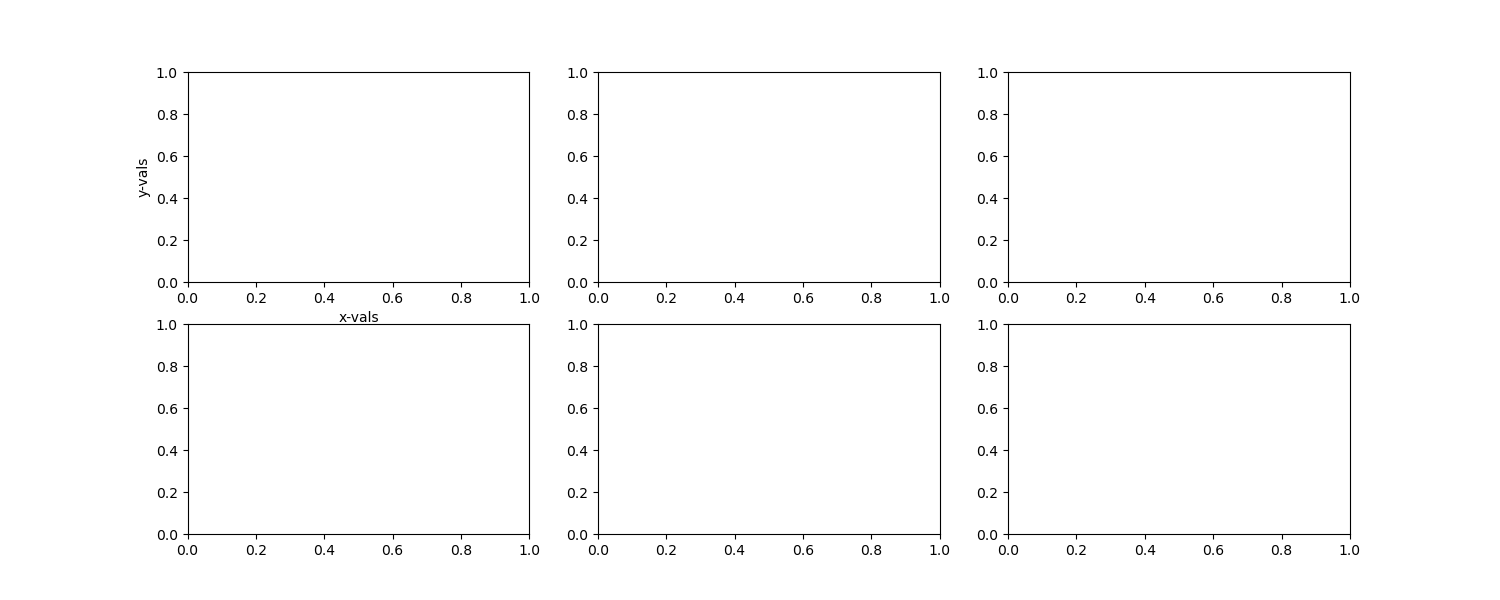

In [74]:
fig, ((top_left, middle_top, top_right), (bottom_left, middle_bottom, bottom_right)) = plt.subplots(nrows=2, 
                                             ncols=3, 
                                             figsize=(15, 6))
top_left.set_ylabel('y-vals')
top_left.set_xlabel('x-vals')